In this notebook let's perform 2 popular techniques that usually applied one by one - **Erosion and Dilation**.

### Librabies import

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

%matplotlib inline 

Let's load a "J" image and perform **erosion and dilation** to compare the outputs. <br>
The main requirement is **binary image** (we specify this as **0**).

### Dilation 

We are going to use `cv2.dilate()` function to apply dilation, that requires following arguments: 
- original **binary image**;
- **kernel**, that will determine the **size of dilation**. Note, we need to create a kernel by ourself. 
  For this case we are going to use 5x5 kernel of ones.
- number of **iterations** (usually = 1).

What will we do in this particular example: we will move 5x5 filter over the image. <br>It will **turn
pixel white if surrounding pixels are white in 5x5 window**.

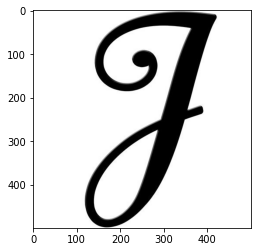

In [2]:
img = cv2.imread('images/j_img.jpg', 0)
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)


plt.imshow(img_copy)

In [3]:
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img_copy, kernel, iterations = 1)

### Erosion

To **erose an image**, we need to use the same params for `cv2.erode()` function. 

In [4]:
erosion = cv2.erode(img_copy, kernel, iterations = 1)

Next, we can **print out 3 images side by side**. 

Text(0.5, 1.0, 'Erosion')

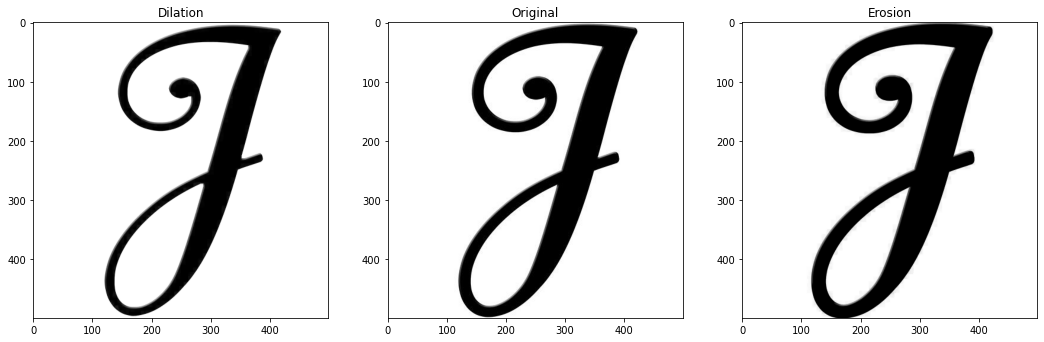

In [5]:
fig = plt.figure(figsize = (18,8))
plt.subplot(131)
plt.imshow(dilation)
plt.title('Dilation')

plt.subplot(132)
plt.imshow(img_copy)
plt.title('Original')

plt.subplot(133)
plt.imshow(erosion)
plt.title('Erosion')

We see, how **erosion enlarges the size of an object, removing white pixels and enlarging black object size**, while **dilation adds more white pixels**, shrinking black object's boundaries.

**To sum it up:**<br>
- Dilation **adds white pixels around an object**;
- Erosion **removes white pixels**, enlarging the size of object.  

Next, we will take a look at **white object on black background**.

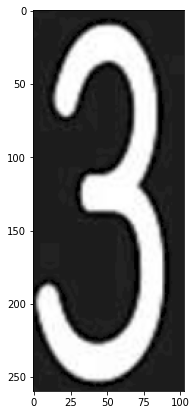

In [6]:
img_new = cv2.imread('images/digit.PNG', 0)
img_copy = np.copy(img_new)

img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

f = plt.figure(figsize = (18,7))
plt.imshow(img_copy)

Now, we can apply the same procedure as we did above and check the results. 

Text(0.5, 1.0, 'Erosion')

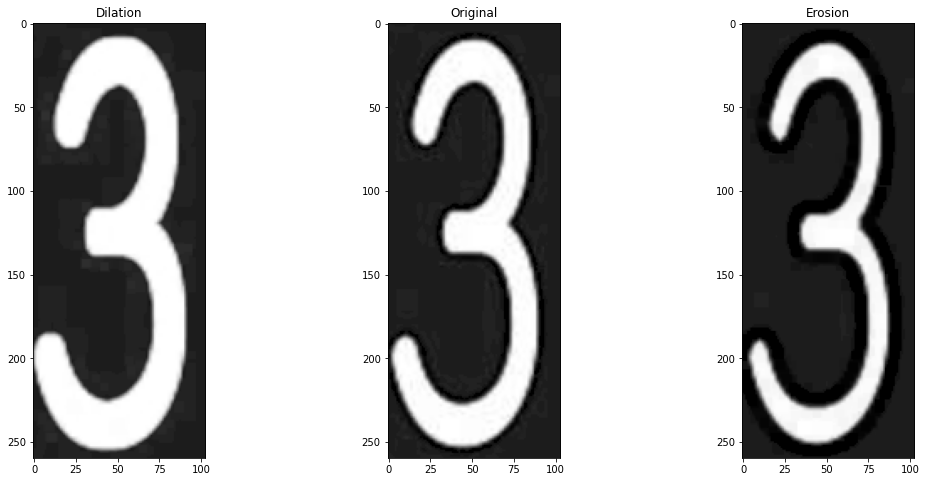

In [7]:
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img_copy, kernel, iterations = 1)
erosion = cv2.erode(img_copy, kernel, iterations = 1)

fig = plt.figure(figsize = (18,8))
plt.subplot(131)
plt.imshow(dilation)
plt.title('Dilation')

plt.subplot(132)
plt.imshow(img_copy)
plt.title('Original')

plt.subplot(133)
plt.imshow(erosion)
plt.title('Erosion')

Above we see an opposite results: Erosion **shrinks white pixels area** and Dilation **enlarges white object**.

### Combination of methods: Opening

We are able to **combine erosion and dilation in a single process**, where **erosion is followed by dilation**. We call this process **Opening**.<br>
Key points:
- Erosion at the start removes the noise;
- Then dilation enlarges the number of white pixels on photo. 

We will use `morphologyEx()` function for this matter. Params are following:<br>
- image (usually performed on binary images); 
- `cv2.MORPH_OPEN` param from open-cv library;
- kernel (we've generated kernel of ones.

Text(0.5, 1.0, 'Opening')

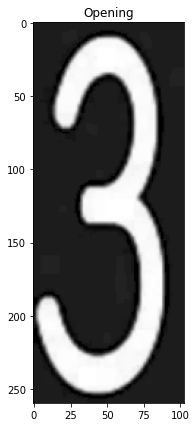

In [8]:
opening = cv2.morphologyEx(img_copy, cv2.MORPH_OPEN, kernel)

f = plt.figure(figsize=(18,7))
plt.imshow(opening)
plt.title('Opening')

We can check how Opening can perform the **noise reduction outside of an object**. <br>
Moreover, let's create a bigger kernel to remove noise more efficiently. 

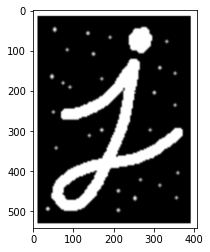

In [9]:
kernel = np.ones((10,10), np.uint8)

img = cv2.imread('images/j_open.png', 0)
plt.imshow(img, cmap = 'gray')

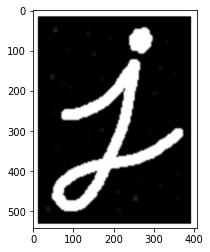

In [10]:
j_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(j_open, cmap='gray')

### Closing 

Closing operation suppose **dilation followed by erosion**, so it helps us to **remove the noise on white object**.<br>
Let's apply the operation on another image. 

We will use the same 10x10 kernel for that. The only difference is that we will use `cv2.MORPH_CLOSE()` for this.

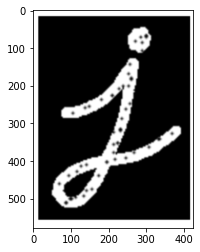

In [11]:
img = cv2.imread('images/j_close.png', 0)
plt.imshow(img, cmap = 'gray')

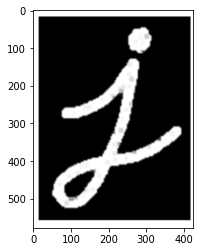

In [12]:
j_open = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(j_open, cmap='gray')

In general, such methods work well for **important information and object shape extractions**. 